# Horizontal and vertical distributions of energy terms


In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr
import cftime
import glob
import dask
import os
import datetime
import matplotlib.colors as col
import dask.array as dsa
from cosima_cookbook import distributed as ccd
import cartopy.crs as ccrs
import cmocean as cm
from scipy.ndimage.filters import uniform_filter1d
import matplotlib as mpl

from matplotlib import gridspec

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

In [2]:
client = Client()
client

Client Scheduler: tcp://127.0.0.1:42145 Dashboard: /proxy/41475/status,Cluster Workers: 4 Cores: 16 Memory: 64.00 GiB


In [3]:
EKE = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/EKE_10yr.nc').EKE
MKE = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/MKE_10yr.nc').MKE
Reynolds = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/Reynolds_10yr_fulldepth.nc').Reynolds
Form_stress = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/Form_stress_10yr_fulldepth.nc').Form_stress
h_bar = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/h_bar_10yr.nc').h_bar
v_bar = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/v_bar_10yr.nc').v_bar
u_bar = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/u_bar_10yr.nc').u_bar
uh_bar = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/uh_bar_10yr.nc').uh_bar
vh_bar = xr.open_dataset('/g/data/x77/cy8964/Post_Process/New_SO/vh_bar_10yr.nc').vh_bar


In [ ]:
# constants for the whole SO
EKE_upwelling = EKE.sel(isopycnal_bins = slice(1032.2,1032.5)).sum('isopycnal_bins')
EKE_top = EKE.sel(isopycnal_bins = slice(1000,1032.2)).sum('isopycnal_bins')
EKE_bottom = EKE.sel(isopycnal_bins = slice(1032.5,1050)).sum('isopycnal_bins')


In [10]:
MKE_upwelling = MKE.sel(isopycnal_bins = slice(1032.2,1032.5)).sum('isopycnal_bins')


In [11]:
# constants for the whole SO
h_upwelling = h_bar.sel(isopycnal_bins = slice(1032.2,1032.5)).sum('isopycnal_bins')
h_top = h_bar.sel(isopycnal_bins = slice(1000,1032.2)).sum('isopycnal_bins')
h_bottom = h_bar.sel(isopycnal_bins = slice(1032.5,1050)).sum('isopycnal_bins')


In [12]:
FS_upwelling = Form_stress.sel(isopycnal_bins = slice(1032.2,1032.5)).sum('isopycnal_bins')
FS_top = Form_stress.sel(isopycnal_bins = slice(1000,1032.2)).sum('isopycnal_bins')
FS_bottom = Form_stress.sel(isopycnal_bins = slice(1032.5,1050)).sum('isopycnal_bins')


In [13]:
RS_upwelling = Reynolds.sel(isopycnal_bins = slice(1032.2,1032.5)).sum('isopycnal_bins')
RS_top = Reynolds.sel(isopycnal_bins = slice(1000,1032.2)).sum('isopycnal_bins')
RS_bottom = Reynolds.sel(isopycnal_bins = slice(1032.5,1050)).sum('isopycnal_bins')


In [19]:
EKExy = (EKE*dxt*dyt).sum('xt_ocean').sum('yt_ocean')
hxy = (h_bar*dxt*dyt).sum('xt_ocean').sum('yt_ocean')/(dxt*dyt).sum('xt_ocean').sum('yt_ocean')
EKEy = (EKE*dxt).sum('xt_ocean')
hy = (h_bar*dxt).sum('xt_ocean')/(dxt).sum('xt_ocean')
FSxy = (Form_stress*dxt*dyt).sum('xt_ocean').sum('yt_ocean')
RSxy = (Reynolds*dxt*dyt).sum('xt_ocean').sum('yt_ocean')

In [14]:
plt.rc('text', usetex=True)
plt.rcParams.update({'font.size': 12})


In [16]:
ht = cc.querying.getvar(expt,'ht', session,n=1)
ht = ht.sel(yt_ocean = slice(-90,-34.99))
mask = (ht*0+1).fillna(0)


# upwelling arm only

Text(-170, -40, 'Reynolds conversion')

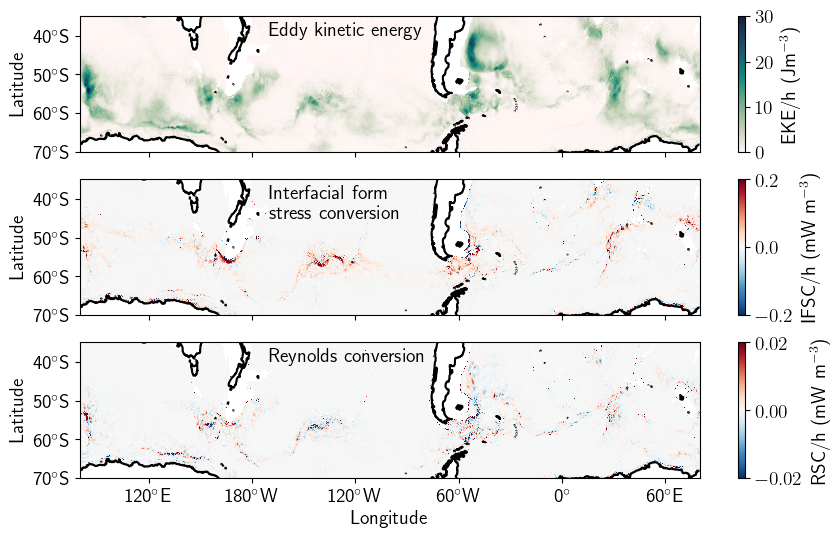

In [51]:
fig = plt.figure(figsize = (10,6))
gs = gridspec.GridSpec(3,1) 
ax0, ax1, ax2,  = plt.subplot(gs[0,0]), plt.subplot(gs[1,0]), plt.subplot(gs[2,0])
# gs.update(wspace = 0.25)
p1 = (EKE_upwelling/h_upwelling).plot(ax = ax0, cmap = cm.cm.tempo, add_colorbar = False, vmax = 30)
plt.colorbar(p1, ax = ax0,label = 'EKE/h (Jm$^{-3}$)')
p2 = (FS_upwelling/h_upwelling*1e3).plot(ax = ax1, cmap = 'RdBu_r', vmin = -0.2, vmax = 0.2, add_colorbar = False)
plt.colorbar(p2, ax = ax1,label = 'IFSC/h (mW m$^{-3}$)')
p3 = (RS_upwelling/h_upwelling*1e3).plot(ax = ax2, cmap = 'RdBu_r', vmin = -0.02, vmax = 0.02, add_colorbar = False)
plt.colorbar(p3, ax = ax2,label = 'RSC/h (mW m$^{-3}$)')

mask.plot.contour(ax = ax0,levels = [0.5],colors = 'k', lineiwdth = 0.1)
mask.plot.contour(ax = ax1,levels = [0.5],colors = 'k', lineiwdth = 0.1)
mask.plot.contour(ax = ax2,levels = [0.5],colors = 'k', lineiwdth = 0.1)

ax0.set_xticks(np.arange(-240,100,60))
ax1.set_xticks(np.arange(-240,100,60))

plt.setp(ax0.get_xticklabels(), visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)

ax0.set_ylabel('Latitude')
ax1.set_ylabel('Latitude')
ax2.set_ylabel('Latitude')
ax0.set_xlabel('')
ax1.set_xlabel('')
ax2.set_xlabel('Longitude')
# ax0.set_title('Surface')
# ax1.set_title('Upwelling Arm')
# ax2.set_title('Bottom')
ax2.set_xticks(np.arange(-240,100,60))
ax2.set_xticklabels(('120$^\circ$E','180$^\circ$W','120$^\circ$W','60$^\circ$W','0$^\circ$','60$^\circ$E'))
ax0.set_yticks(np.arange(-70,-39,10))
ax0.set_yticklabels(['70$^\circ$S','60$^\circ$S','50$^\circ$S','40$^\circ$S'])
ax1.set_yticks(np.arange(-70,-39,10))
ax1.set_yticklabels(['70$^\circ$S','60$^\circ$S','50$^\circ$S','40$^\circ$S'])
ax2.set_yticks(np.arange(-70,-39,10))
ax2.set_yticklabels(['70$^\circ$S','60$^\circ$S','50$^\circ$S','40$^\circ$S'])

# scfac = 11
# ax3.plot((EKExy/hxy).sel(isopycnal_bins = slice(1025,1035))/1e15,(EKExy.sel(isopycnal_bins = slice(1025,1035)).isopycnal_bins.values-1024)**scfac, color = 'C2')

# ax3.hlines((EKExy.sel(isopycnal_bins = slice(1025,1035)).isopycnal_bins.values-1024)**scfac,0,2.5, color = 'grey', linewidth = 0.5)
# rhos = np.array([1030,1031,1031.5,1032,1032.2,1032.4,1032.5,1032.6])
# ax3.set_yticks((rhos-1024)**scfac)
# ax3.set_yticklabels(rhos, fontsize = 12)

# ax3.set_ylim(8.65**scfac,5**scfac)
# ax3.set_ylabel('Potential density ($\sigma_1$) (kgm$^{-3}$)')
# ax3.set_xlabel('EKE/h (PJ/m)')
# ax3.vlines(0.5,8.525**scfac,8.423**scfac, color = 'k', linewidth = 3)
# ax3.text(0.8,8.47**scfac, 'Upwelling \n Everywhere')
# ax3.text(0.8,8.3**scfac, 'Top')
# ax3.text(0.8,8.6**scfac, 'Bottom')

ax0.text(-170,-40,'Eddy kinetic energy')
ax1.text(-170,-45,'Interfacial form \nstress conversion')
ax2.text(-170,-40,'Reynolds conversion')

#fig.savefig('temp.png',dpi = 400)

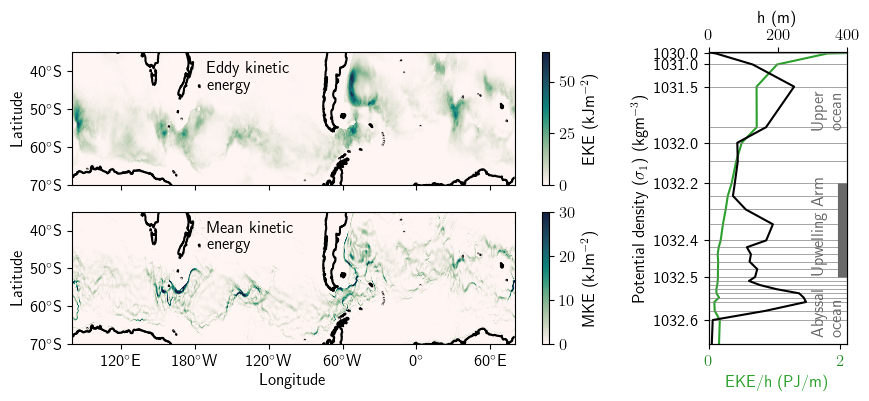

In [29]:
fig = plt.figure(figsize = (10,4))
gs = gridspec.GridSpec(2,2, width_ratios = [4,1]) 
ax0, ax1, ax4  = plt.subplot(gs[0,0]), plt.subplot(gs[:,1]), plt.subplot(gs[1,0])
gs.update(wspace = 0.24)
p1 = (EKE_upwelling/1000).plot(ax = ax0, cmap = cm.cm.tempo, add_colorbar = False)
plt.colorbar(p1, ax = ax0,label = 'EKE (kJm$^{-2}$)')
p4 = (MKE_upwelling/1000).plot(ax = ax4, cmap = cm.cm.tempo, add_colorbar = False, vmax = 30)
plt.colorbar(p4, ax = ax4,label = 'MKE (kJm$^{-2}$)')

mask.plot.contour(ax = ax0,levels = [0.5],colors = 'k', linewidth = 0.1)
mask.plot.contour(ax = ax4,levels = [0.5],colors = 'k', linewidth = 0.1)

ax0.set_xticks(np.arange(-240,100,60))
plt.setp(ax0.get_xticklabels(), visible=False)

ax0.set_ylabel('Latitude')
ax4.set_ylabel('Latitude')

ax0.set_xlabel('')
ax4.set_xlabel('Longitude')
# ax0.set_title('Surface')
# ax1.set_title('Upwelling Arm')
# ax2.set_title('Bottom')
ax4.set_xticks(np.arange(-240,100,60))
ax4.set_xticklabels(('120$^\circ$E','180$^\circ$W','120$^\circ$W','60$^\circ$W','0$^\circ$','60$^\circ$E'))
ax0.set_yticks(np.arange(-70,-39,10))
ax0.set_yticklabels(['70$^\circ$S','60$^\circ$S','50$^\circ$S','40$^\circ$S'])
ax4.set_yticks(np.arange(-70,-39,10))
ax4.set_yticklabels(['70$^\circ$S','60$^\circ$S','50$^\circ$S','40$^\circ$S'])

ax0.text(-170,-45,'Eddy kinetic \nenergy')
ax4.text(-170,-45,'Mean kinetic \nenergy')
scfac = 15
ax3 = ax1.twiny()

ax3.plot((hxy).sel(isopycnal_bins = slice(1025,1035)),(EKExy.sel(isopycnal_bins = slice(1025,1035)).isopycnal_bins.values-1024)**scfac, color = 'k')

ax3.hlines((EKExy.sel(isopycnal_bins = slice(1025,1035)).isopycnal_bins.values-1024)**scfac,0,400, color = 'grey', linewidth = 0.5)
rhos = np.array([1030,1031,1031.5,1032,1032.2,1032.4,1032.5,1032.6])
ax3.set_xlabel('h (m)', color = 'k')
ax3.vlines(390,8.5**scfac,8.2**scfac, color = 'dimgrey', linewidth = 8)
ax3.text(300,8.49**scfac, 'Upwelling Arm', color = 'dimgrey',rotation = 90)
ax3.text(300,7.9**scfac, 'Upper \nocean', color = 'dimgrey',rotation = 90)
ax3.text(300,8.63**scfac, 'Abyssal \nocean', color = 'dimgrey',rotation = 90)

ax3.set_xlim(0,400)
ax1.plot((EKExy/hxy).sel(isopycnal_bins = slice(1025,1035))/1e15,(EKExy.sel(isopycnal_bins = slice(1025,1035)).isopycnal_bins.values-1024)**scfac, color = 'C2')

ax3.set_yticks((rhos-1024)**scfac)
ax3.set_yticklabels(rhos, fontsize = 11)
ax1.set_ylim(8.65**scfac,5**scfac)
ax1.set_ylabel('Potential density ($\sigma_1$) (kgm$^{-3}$)')
ax1.set_xlabel('EKE/h (PJ/m)', color = 'C2')
ax1.set_xlim(0,2.1)

ax3.tick_params(axis='x', labelcolor='k')
ax1.tick_params(axis='x', labelcolor='forestgreen')

fig.subplots_adjust(bottom = 0.15)

fig.savefig('EKEMKEdepthdist.png',dpi = 400)

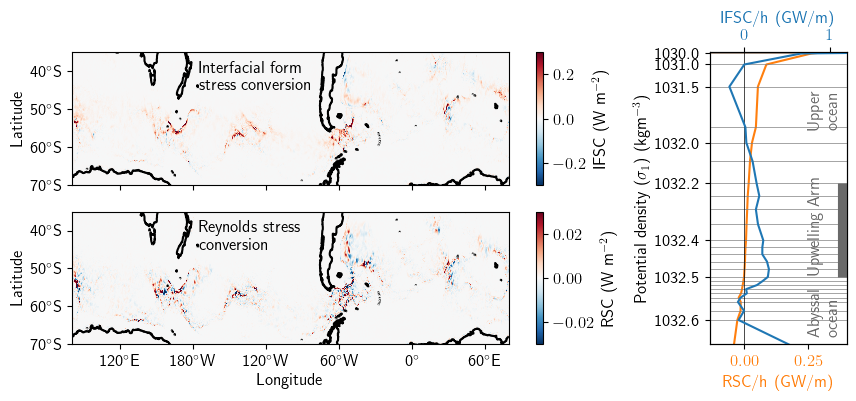

In [28]:
fig = plt.figure(figsize = (10,4))
gs = gridspec.GridSpec(2,2, width_ratios = [4,1]) 
ax0, ax1, ax4  = plt.subplot(gs[0,0]), plt.subplot(gs[:,1]), plt.subplot(gs[1,0])
gs.update(wspace = 0.27)
p2 = (FS_upwelling).plot(ax = ax0, cmap = 'RdBu_r', add_colorbar = False, vmax = 0.3, vmin = -0.3)
plt.colorbar(p2, ax = ax0,label = 'IFSC (W m$^{-2}$)')
p3 = (RS_upwelling).plot(ax = ax4, cmap = 'RdBu_r', add_colorbar = False, vmax = 0.03, vmin = -0.03)
plt.colorbar(p3, ax = ax4,label = 'RSC (W m$^{-2}$)')

mask.plot.contour(ax = ax0,levels = [0.5],colors = 'k', linewidth = 0.1)
mask.plot.contour(ax = ax4,levels = [0.5],colors = 'k', linewidth = 0.1)

ax0.set_xticks(np.arange(-240,100,60))
plt.setp(ax0.get_xticklabels(), visible=False)

ax0.set_ylabel('Latitude')
ax4.set_ylabel('Latitude')

ax0.set_xlabel('')
ax4.set_xlabel('Longitude')
# ax0.set_title('Surface')
# ax1.set_title('Upwelling Arm')
# ax2.set_title('Bottom')
ax4.set_xticks(np.arange(-240,100,60))
ax4.set_xticklabels(('120$^\circ$E','180$^\circ$W','120$^\circ$W','60$^\circ$W','0$^\circ$','60$^\circ$E'))
ax0.set_yticks(np.arange(-70,-39,10))
ax0.set_yticklabels(['70$^\circ$S','60$^\circ$S','50$^\circ$S','40$^\circ$S'])
ax4.set_yticks(np.arange(-70,-39,10))
ax4.set_yticklabels(['70$^\circ$S','60$^\circ$S','50$^\circ$S','40$^\circ$S'])

ax0.text(-175,-45,'Interfacial form\nstress conversion')
ax4.text(-175,-45,'Reynolds stress \nconversion')
scfac = 15
ax3 = ax1.twiny()

ax3.plot((FSxy/hxy/1e9).sel(isopycnal_bins = slice(1025,1035)),(FSxy.sel(isopycnal_bins = slice(1025,1035)).isopycnal_bins.values-1024)**scfac, color = 'C0')

ax3.hlines((hxy.sel(isopycnal_bins = slice(1025,1035)).isopycnal_bins.values-1024)**scfac,-1,2, color = 'grey', linewidth = 0.5)
rhos = np.array([1030,1031,1031.5,1032,1032.2,1032.4,1032.5,1032.6])
ax3.set_xlabel('IFSC/h (GW/m)',color = 'C0')
ax3.vlines(1.15,8.5**scfac,8.2**scfac, color = 'dimgrey', linewidth = 8)
ax3.text(0.75,8.49**scfac, 'Upwelling Arm', color = 'dimgrey',rotation = 90)
ax3.text(0.75,7.9**scfac, 'Upper \nocean', color = 'dimgrey',rotation = 90)
ax3.text(0.75,8.63**scfac, 'Abyssal \nocean', color = 'dimgrey',rotation = 90)

ax3.set_xlim(-0.4,1.2)
ax1.plot((RSxy/hxy/1e9).sel(isopycnal_bins = slice(1025,1035)),(RSxy.sel(isopycnal_bins = slice(1025,1035)).isopycnal_bins.values-1024)**scfac, color = 'C1')
ax3.vlines(0,8.65**scfac,5**scfac, color = 'k', linewidth = 0.5)
ax3.set_yticks((rhos-1024)**scfac)
ax3.set_yticklabels(rhos, fontsize = 11)
ax1.set_ylim(8.65**scfac,5**scfac)
ax1.set_ylabel('Potential density ($\sigma_1$) (kgm$^{-3}$)')
ax1.set_xlabel('RSC/h (GW/m)', color = 'C1')
ax1.set_xlim(-0.1333,0.4)

ax3.tick_params(axis='x', labelcolor='C0')
ax1.tick_params(axis='x', labelcolor='C1')

fig.subplots_adjust(bottom = 0.15)
fig.savefig('IFSCRSCdepthdist.png',dpi = 400)

In [85]:
(EKE*dxt*dyt).sum('isopycnal_bins').sum('xt_ocean').sum('yt_ocean').values

array(9.73580914e+17)

In [86]:
(Form_stress*dxt*dyt).sum('isopycnal_bins').sum('xt_ocean').sum('yt_ocean').values

array(2.70464595e+11)

In [87]:
(Reynolds*dxt*dyt).sum('isopycnal_bins').sum('xt_ocean').sum('yt_ocean').values

array(2.80839053e+10)